## Software cost estimation I

**Este es un ejerciocio práctico  con propósitos académicos.**

**Universidad distrital Francisco José de Caldas**

**20181495019 Raúl Villabona  Suárez**

*Dueño: Martin Shepperd (Martin.Shepperd@brunel.ac.uk) Creators: Original data was presented in J. M. Desharnais' Masters Thesis. Martin Shepperd created the ARFF file.*

El dataset fue tomado de:  https://www.kaggle.com/toniesteves/estimating-software-effort-using-linear-regression/data.

In [ ]:
import math
from scipy.io import arff
import pandas as pd
from pandas import Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from scipy.stats import expon
from scipy import stats
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
df_fp = pd.read_excel('../input/fp.xlsx', delim_whitespace = True,
names=['id', 'Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 'Transactions','Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust','Language']
)
df_fp.dataframeName = 'fp.xlsx'
labels = list('AB')

**Descripción del dataset:**

In [ ]:
df_fp.head(10)

El presente ejercicio pretende ser un ejercicio exploratiorio acerca una temátiza de investigación relacionada con el ámbito de los costos de producción de software.  El proceso de estimación de costos de software es  un proceso sujeto a un grado alto de incertidumbre lo que ocasiona en muchos casos que las empresas fracasen o afecten su imagen. 

Se pretende, por tanto, respoonder algunas preguntas relaciondas que pueden ser de interés para la temátiza tratada.  Los datos con los que contamos para este ejercicio miden el tamaño de los proyectos de software partiendo de la estrategia  de puntos de función, la cual es una  alternativa ampliamente aceptada hoy en la industria, no obstate, no es la única.

Podríamos intetar reponder preguntas tales como:  

1. ¿Cómo medir el costo de producción de un proyecto de software a partir de datos históricos  de proyectos similares?
2. ¿Qué tipo de correlación existe entre el lenguaje de programación usado y el esfuerzo total del proyecto?
3. ¿La inexperiencia  del equipo de desarrollo incrementa el costo del proyecto?
4. ¿Qué tipo de correlación existe entre los puntos de función sin ajustar y la experiencia del director del proyecto?

**Columnas del data set**

* **Id**:  ID del proyecto
* **Project**: Información del proyecto
* **TeamExp**:  Experiencia del equipo del desarrollo, medida en años.
* **ManagerExp**: Experiencia del Team Manager del proyecto, medida en años.
* **YearEnd**: Año de finalizacíon del proyecto.
* **Length**: Duración del proyecto en meses.
* **Effort**:  Esfuerzo del proyecto medido en horas-hombre.
* **Transactions**: Número de transaciones básicas del sistema.
* **Entities**:  Número de entidades en el modelo de datos de sistema.
* **PointsNonAdjust**: Tamaño del proyecto medido en puntos de función ajustados.
* **Adjustment**: Porcentaje de ajuste.
* **PointsAjust**:  Tamaño del proyecto medido en puntos de función sin ajuste.
* **Language**: Lenguiaje de programación utilizado, expresado como, 1, 2 o 3.

El  data set fue tomado de  PROMISE Software Engineering Repositor ([http://promise.site.uottawa.ca/SERepository/](http://)).
Allí puede encontrar conjuntos de datos públicos para ser utilizados en  modelos  predictivos de software (PSM). Para más información por favor siga el vínculo.

El data set fue tomado sólo con propósitos académicos y de aprendizaje.

El estándar de puntos de función está regulado por la siguientes normas: 
[http://www.ifpug.org/]
[https://www.iso.org/standard/35582.html]

**Function points method.**
        * ISO/IEC 20926:2009 IFPUG 4.3.1 Unadjusted functional size measurement method - Counting practices manual
        * ISO/IEC 19761:2011 COSMIC-FFP - A Functional Size Measurement Method
        * ISO/IEC 20968:2002 Mk II Function Point Analysis - Counting Practices Manual
        * ISO/IEC 24570:2005 NESMA Guide to Using Function Point Analysis
      
Actualmente: un punto de función equivale a  11,50 horas-hombre.  En función de 14  **características generales del sistema** que se valoran de 0 a 5.  De acuerdo a su grado de influencia en el software se calcula un factor de ajuste al recuento. Estas características tienen que ver con la arquitectura de la aplicación, sus requisitos de carga y rendimiento, complejidad de cálculos, etc.   

**Estadística exploratoria:** 

**Histograma "Effort"**

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Effort cost estimation')
plt.grid(True)
plt.hist(df_fp.Effort, bins = 100, alpha=1, color = "skyblue",  linewidth=1)
plt.show()

**Histograma  "Entities"**

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Entities')
plt.grid(True)
plt.hist(df_fp.Entities, bins = 100, alpha=1, color = "y",  linewidth=1)
plt.show()

**Histograma  "Transactions "**

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Transactions')
plt.grid(True)
plt.hist(df_fp.Transactions, bins = 100, alpha=1, color = "firebrick",  linewidth=1)
plt.show()

El histograma del esfuerzo sugiere aparentemente una distribución Gama, cuya función de densidad está dada por:

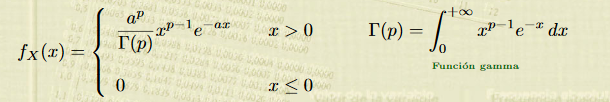

Definamos algunas funciones para graficar los datos:

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

**Graficando la  distribución  de algunas columnas del data set:**

In [ ]:
plotPerColumnDistribution(df_fp, 10, 3)

Grafiquemos sólo el esfuerzo: 



In [ ]:
sns.distplot(df_fp.Effort);

Calculamos la estadística básica relacionada con el esfuerzo, el número de transaciones, la experiencia del equipo y la experiencia del líder del proyecto, respectivamente:

In [ ]:
print (df_fp.Effort.describe())
print (df_fp.Transactions.describe())
print (df_fp.TeamExp.describe())
print (df_fp.ManagerExp.describe())

Ya podemos  comenzar a responder situciones en este punto: por ejmeplo que la experiencia delm líder del proyecto no es superior a la experiencia del equipo, lo cual a todas luces parece anòmalo.

**Veamos entonces la atipicidad de los datos: **

*Esfuerzo, número de transactions, experiencia del equipo, experiencia del íder del proyecto, puntos de función ajustados y no ajustados,* respectivamente:

Antes veamos con más detalle el histograma de lso lenguajes de programación usados por proyecto: 

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Languages')
plt.grid(True)
plt.hist(df_fp.Language, bins = 100, alpha=1,  linewidth=1, color=['orange'])
plt.show()

In [ ]:
# Esfuerzo
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df_fp.Effort)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)


In [ ]:
#Numero de transaciones
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df_fp.Transactions)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

In [ ]:
#Experiencia del equipo (A), experiencia del lider (B).
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
data_to_plot = [df_fp.TeamExp, df_fp.ManagerExp]
bp = ax.boxplot(data_to_plot, labels=labels,showmeans=True, meanline=True)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

In [ ]:
#Puntos de Funcion no ajustados (A), Ajustados (B).
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
data_to_plot = [df_fp.PointsNonAdjust, df_fp.PointsAjust]
bp = ax.boxplot(data_to_plot, labels=labels,showmeans=True, meanline=True)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)